<a href="https://colab.research.google.com/github/Jain-Pranjal/BD-assignment/blob/master/BD_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# loading the file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/Jain-Pranjal/BD-assignment/master/bdAssignment.csv")
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141350 entries, 0 to 141349
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   internal_product_code  141350 non-null  object
 1   internal_geo_code      141350 non-null  object
 2   period_start           141350 non-null  object
 3   value                  141350 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 4.3+ MB
None


,internal_product_code,internal_geo_code,period_start,value
0,FGIQopr4,2OsrePjO,2021-01-01 00:00:00.000000,60800
1,FGIQopr4,2OsrePjO,2021-02-01 00:00:00.000000,65750
2,FGIQopr4,2OsrePjO,2021-03-01 00:00:00.000000,88350
3,FGIQopr4,2OsrePjO,2021-04-01 00:00:00.000000,78750
4,FGIQopr4,2OsrePjO,2021-05-01 00:00:00.000000,83550


In [7]:
# checking for the null values
print(df.isnull().sum())


internal_product_code    0
internal_geo_code        0
period_start             0
value                    0
dtype: int64


In [14]:

# Converting 'period_start' to datetime
df['period_start'] = pd.to_datetime(df['period_start'])
df.head()

,internal_product_code,internal_geo_code,period_start,value
0,FGIQopr4,2OsrePjO,2021-01-01,60800
1,FGIQopr4,2OsrePjO,2021-02-01,65750
2,FGIQopr4,2OsrePjO,2021-03-01,88350
3,FGIQopr4,2OsrePjO,2021-04-01,78750
4,FGIQopr4,2OsrePjO,2021-05-01,83550


In [15]:

# Set it as index
df.set_index('period_start', inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Display dataset info
print(df.info())

# Show first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141350 entries, 2021-01-01 to 2025-02-01
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   internal_product_code  141350 non-null  object
 1   internal_geo_code      141350 non-null  object
 2   value                  141350 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.3+ MB
None


,internal_product_code,internal_geo_code,value
period_start,,,
2021-01-01,FGIQopr4,2OsrePjO,60800
2021-01-01,yQOG6Bqj,2OsrePjO,10
2021-01-01,7iYwuOhT,2OsrePjO,60
2021-01-01,U6e8cojY,2OsrePjO,0
2021-01-01,QWdsrbxI,2OsrePjO,500


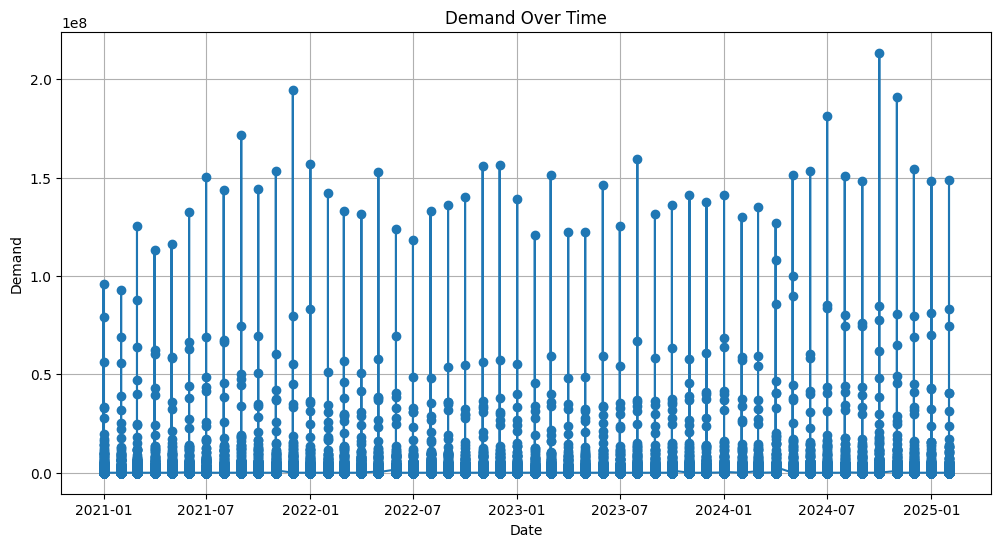

In [16]:
# making the graph to perform EDA
plt.figure(figsize=(12, 6))
plt.plot(df['value'], marker='o', linestyle='-')
plt.title("Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.grid()
plt.show()

# X axis will contains the index (dateTime value)

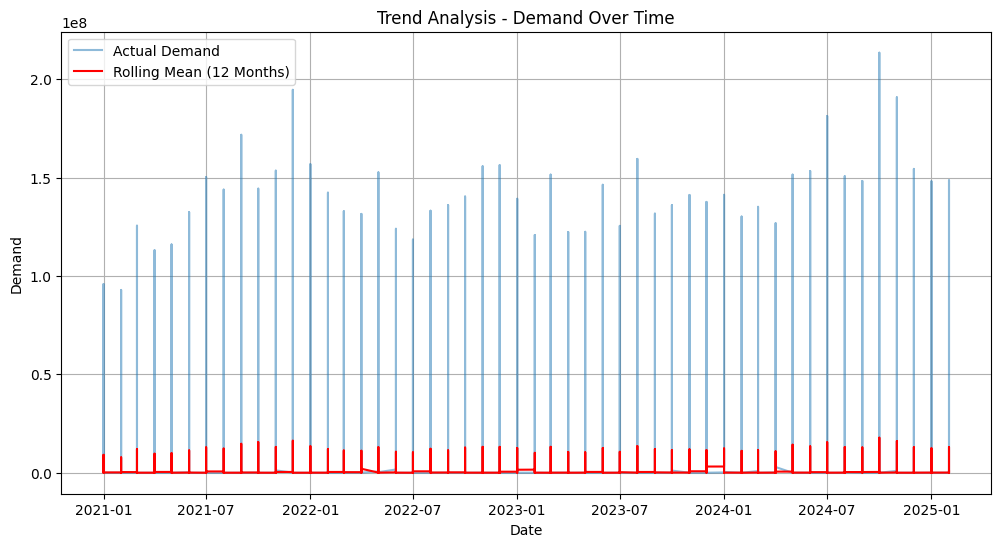

In [19]:
df['rolling_mean'] = df['value'].rolling(window=12).mean()
# accounting the window for 12 months
plt.figure(figsize=(12, 6))
plt.plot(df['value'], label='Actual Demand', alpha=0.5)
plt.plot(df['rolling_mean'], label='Rolling Mean (12 Months)', color='red')
plt.title("Trend Analysis - Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.grid()
plt.show()


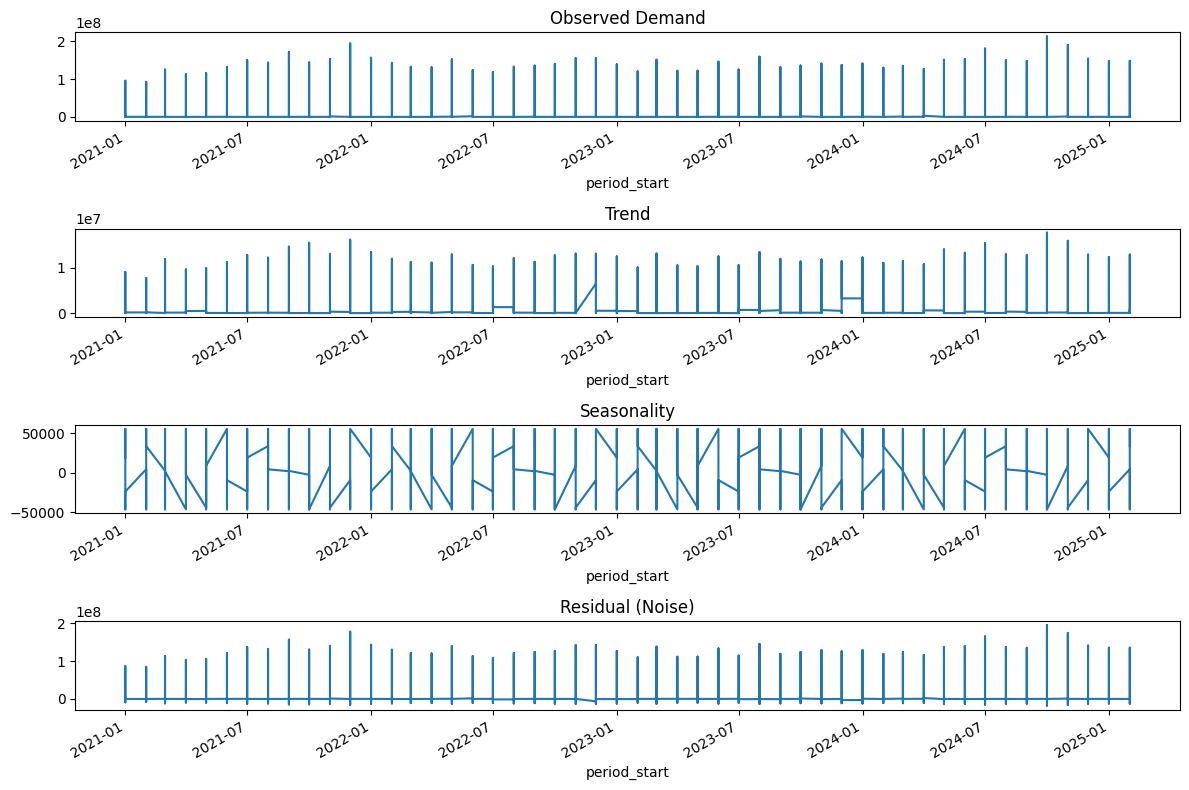

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['value'], model='additive', period=12)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=axes[0], title="Observed Demand")
decomposition.trend.plot(ax=axes[1], title="Trend")
decomposition.seasonal.plot(ax=axes[2], title="Seasonality")
decomposition.resid.plot(ax=axes[3], title="Residual (Noise)")

plt.tight_layout()
plt.show()


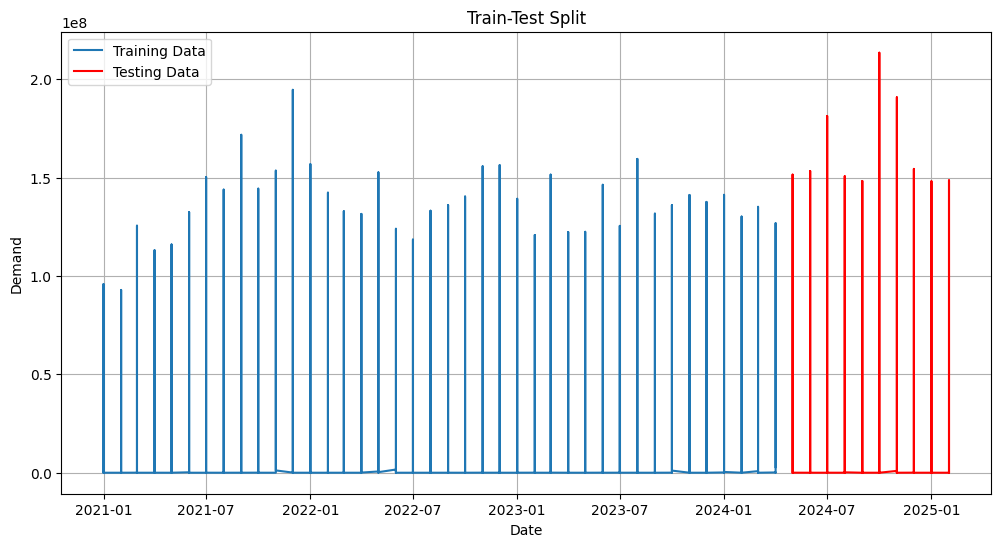

In [24]:
# Making the test and train data
# Determine 80% of the data for training
split_ratio = 0.8
split_index = int(len(df) * split_ratio)  # Find index for 80% split

# Split data into training (80%) and testing (20%)
train = df.iloc[:split_index]
test = df.iloc[split_index:]


# Plot the split
plt.figure(figsize=(12, 6))
plt.plot(train['value'], label='Training Data')
plt.plot(test['value'], label='Testing Data', color='red')
plt.title("Train-Test Split")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

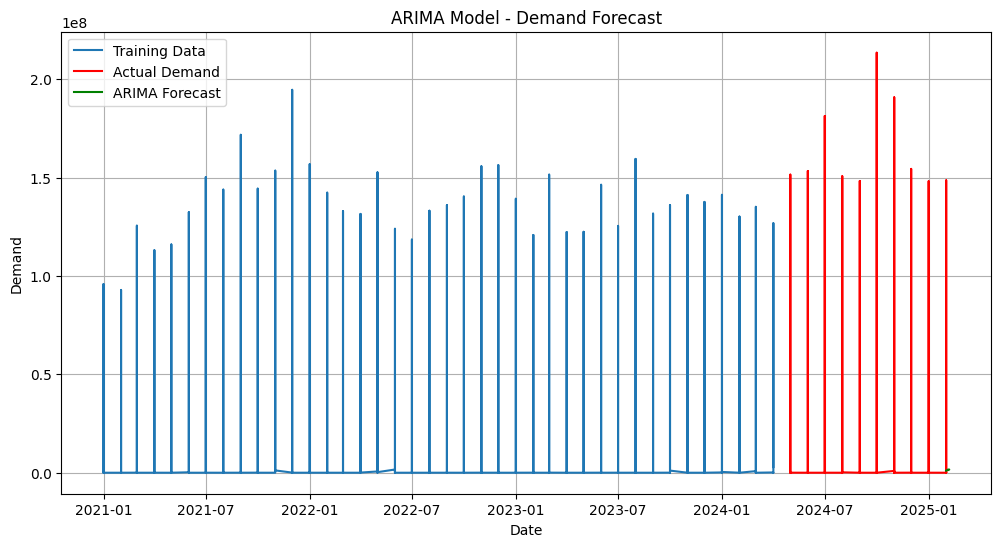

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
model = ARIMA(train['value'], order=(5,1,0))
arima_model = model.fit()

# Forecast next 6 months
forecast = arima_model.forecast(steps=6)

# Generate a date range for the forecast

forecast_index = pd.date_range(start=test.index[-1], periods=6, freq=test.index.freq)


# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(train['value'], label='Training Data')
plt.plot(test['value'], label='Actual Demand', color='red')
plt.plot(forecast_index, forecast, label='ARIMA Forecast', color='green')
plt.title("ARIMA Model - Demand Forecast")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.grid()
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics
forecast_values = forecast.values  # Get the values from the forecast Series

test_values_subset = test['value'][:len(forecast_values)]

mae = mean_absolute_error(test_values_subset, forecast_values)
rmse = np.sqrt(mean_squared_error(test_values_subset, forecast_values))

# Calculate MAPE with aligned values
non_zero_mask = test_values_subset != 0
mape = np.mean(np.abs((test_values_subset[non_zero_mask] - forecast_values[non_zero_mask]) / test_values_subset[non_zero_mask])) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 1169531.30
RMSE: 1212686.33
MAPE: 40717.90%


As values are too high so we are rejecting the ARIMA (univariate)